In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('shap_beeswarm_total_avg_data.csv')

In [2]:
columns = np.array(data['Unnamed: 0'])

In [3]:
columns

array(['1_1', '1_2', '1_3', '2_1', '2_2', '2_3', '3_1', '3_2', '3_3',
       '4_1', '4_2', '4_3'], dtype=object)

In [4]:
np.array(data['0']).reshape(1, 12)

array([[0.33771516, 0.03529383, 0.35937791, 0.56870933, 0.03639224,
        0.67446095, 0.27149164, 0.0283942 , 0.34774273, 0.23042714,
        0.04637258, 0.08557769]])

In [5]:
new_data = pd.DataFrame(np.array(data['0']).reshape(1, 12), columns=columns)

In [7]:
new_data['act_1'] = (new_data['1_1'] + new_data['1_2'] + new_data['1_3']) 
new_data['act_2'] = (new_data['2_1'] + new_data['2_2'] + new_data['2_3']) 
new_data['act_3'] = (new_data['3_1'] + new_data['3_2'] + new_data['3_3']) 
new_data['act_4'] = (new_data['4_1'] + new_data['4_2'] + new_data['4_3']) 

In [8]:
final = new_data[['act_1', 'act_2', 'act_3', 'act_4']]

In [12]:
values = final.loc[0].tolist()

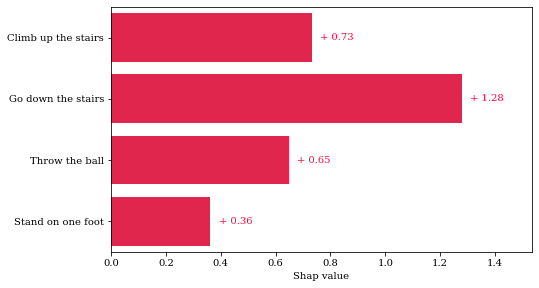

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.figure(figsize=(9, 4))
sns.barplot(x=values, y=['Climb up the stairs', 'Go down the stairs', 'Throw the ball', 'Stand on one foot'], orient='h', color=sns.xkcd_rgb['neon red'])
plt.xlabel('Shap value')
for i in range(len(values)):
    plt.text(values[i]+0.03, i, f"+ {values[i]:.2f}", va='center', ha='left', color=sns.xkcd_rgb['neon red'], fontsize=10)
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)
plt.xlim(0, max(values)*1.2)
plt.savefig("shap_by_action.png", dpi=700)
